### TP 1
####   Adan Rodriguez
####   DataSet usado: breast cancer diagnosis
####   Objetivo: saber si a partir de ciertos detalles del tumor, intentar predecir si un tumor podra ser maligno o benigno

In [168]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [169]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### Ahora limpiare el dataset de modo que omita campos como uri, artists_names etc y se persistira solo datos cuantitativos


In [170]:
df = df.drop(['id'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


ya que la ultima columna esta constituida por NaN, la eliminamos del dataset


In [171]:
df = df.dropna(axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [172]:
'''Vemos si hay datos nulos en nuestro dataset'''
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [173]:
#Resumen del dataframe
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##### Ahora traduciremos el valor categorico M o B a uno numerico 1 o 0

In [174]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

#Transformo la columna
df.iloc[:, 0] = labelencoder_X.fit_transform(df.iloc[:, 0])


df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [262]:
#Separamos la variable independiente
y = pd.DataFrame(df.iloc[:, 0])
X = df.drop('diagnosis', axis=1)

X_df = X




##### Ahora para ver el p valor de cada campo le agregamos una fila de 1 a la matriz

In [219]:
# agregamos la columna de 1 al conjunto X original
X = np.append(arr = np.ones((569,1)).astype(int), values = X, axis = 1)

In [179]:

def EliminacionBackward(x, sl): 
    numVars = len(x[0]) 
    for i in range(0, numVars): 
        regressor_OLS = sm.OLS(y, x.tolist()).fit() 
        maxVar = max(regressor_OLS.pvalues) 
        if maxVar > sl: 
            for j in range(0, numVars - i): 
                if (regressor_OLS.pvalues[j] == maxVar): 
                    x = np.delete(x, j, 1) 
    regressor_OLS.summary() 
    return x

In [257]:
#Eliminamos las variables con mayor valor p automaticamente y mostramos el resultado
X_opt = X

X_Modelado = EliminacionBackward(X_opt, SL)

pd.DataFrame(X_Modelado).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,17.99,0.27760,0.14710,1.0950,0.006399,0.05373,0.01587,25.38,17.33,2019.0,0.7119,0.4601,0.11890
1,1.0,20.57,0.07864,0.07017,0.5435,0.005225,0.01860,0.01340,24.99,23.41,1956.0,0.2416,0.2750,0.08902
2,1.0,19.69,0.15990,0.12790,0.7456,0.006150,0.03832,0.02058,23.57,25.53,1709.0,0.4504,0.3613,0.08758
3,1.0,11.42,0.28390,0.10520,0.4956,0.009110,0.05661,0.01867,14.91,26.50,567.7,0.6869,0.6638,0.17300
4,1.0,20.29,0.13280,0.10430,0.7572,0.011490,0.05688,0.01885,22.54,16.67,1575.0,0.4000,0.2364,0.07678


In [258]:
#Con este X auxiliar veremos y eliminaremos las columnas que menos influyan segun su p valor
# X_opt, al inicio, tomará todas las filas y cada una de las columnas del conjunto de datos. 
X_opt = X[:, [0, 1, 6, 8, 11, 15, 17, 18, 21, 22, 24, 27, 29, 30]] #Eliminacion hecha a mano para comparar con la eliminacion automatica

#convierto columna a tipo numerico
y = y.astype(int)

# tecnica OLS
SL = 0.05
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
# observar el p valor en el sumario
regression_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 23 May 2023   Prob (F-statistic):          3.34e-168
Time:                        17:47:43   Log-Likelihood:                 26.008
No. Observations:                 569   AIC:                            -24.02
Df Residuals:                     555   BIC:                             36.80
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0783      0.182    -11.449      0.000      -2.435      -1.722
x1            -0.0340      0.015     -2.224      0.027      -0.064      -0.004
x2            -3.3622      0.552     -6.092      0.000      -4.446      -2.278
x3             4.9320      0.943      5.230      0.000       3.080       6.784
x4             0.2147      0.069      3.105      0.002       0.079       0.351
x5            19.6509      4.335      4.533      0.000      11.135      28.167
x6            -3.0397      0.747     -4.067      0.000      -4.508      -1.571
x7             7.7568      3.348      2.317      0.021       1.180      14.334
x8             0.1657      0.021      8.041      0.000       0.125       0.206
x9             0.0102      0.002      5.552      0.000       0.007       0.014
x10           -0.0009      0.000     -7.663      0.000      -0.001      -0.001
x11            0.6533      0.144      4.537      0.000       0.370       0.936
x12            0.7751      0.213      3.634      0.000       0.356       1.194
x13            3.3066      1.139      2.903      0.004       1.070       5.544
==============================================================================
Omnibus:                       27.517   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.209
Skew:                           0.554   Prob(JB):                     2.76e-07
Kurtosis:                       3.218   Cond. No.                     4.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
#Ahora asignamos el dataFrame real con los campos que sabemos que su valor p es menor a 0.05
X_df = X_df.iloc[:, [0, 5, 7, 10, 14, 16, 17, 20, 21, 23, 26, 28, 29]]

<Axes: >

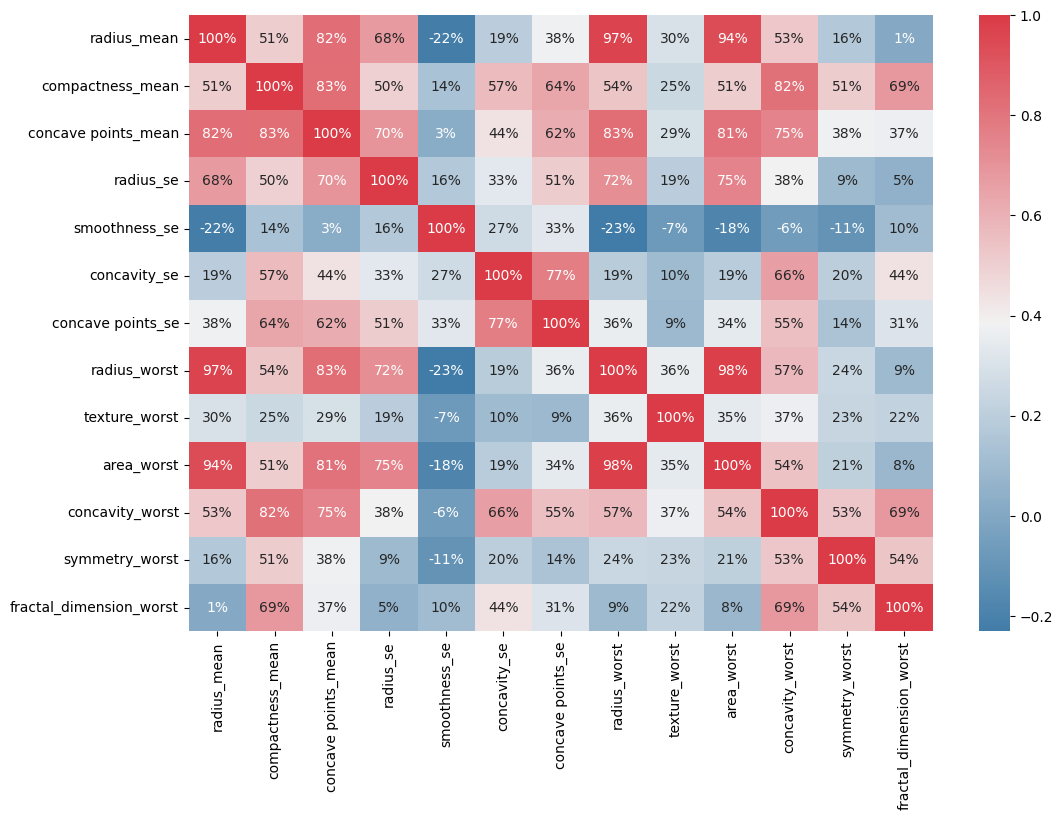

In [272]:
#Se muestra la matriz de correlacion resultante
corr = pd.DataFrame(X_df).corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True))